# Часть 1

- Проверьте на Python ваши ответы из теста к лекции (3 балла):
  - Посчитайте значение градиента в точке 
  - Посчитайте одну итерацию (x, y) градиентного спуска.
  - Посчитайте значение градиента в точке (x, y).
  - Посчитайте вторую итерацию (x, y) градиентного спуска.
- Запустите 10 шагов и посмотрите на полученные значения — списком или на графике. Сделайте вывод о сходимости (для этого можно выводить значения градиента на каждом шаге) (3 балла).
- Найдите аналитически значение оптимума для функции z. Это локальный максимум — градиентный спуск такие значения может проскакивать. (4 балла)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [2]:
def z(point):
    x, y = point
    return 13*x**3 - 7*x*y + y**2 +2*y**3 - 97
def dz(point):
    x, y = point
    return np.array([39*x**2-7*y, -7*x+6*y**2+2*y])

In [3]:
def grad_descent_v1(f, deriv, x0=None, lr=0.1, iters=100, callback=None):
    """ 
    Реализация градиентного спуска для функции
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param x0: float — начальная точка
    :param lr: float — learning rate
    :param iters: int — количество итераций
    :param callback: callable — функция логирования
    """
    x = x0
    for i in range(iters):
        callback(x, f(x), deriv(x))
        x0 -= lr * deriv(x0)
        x = x0
    callback(x, f(x), deriv(x))     
    return x

In [4]:
X = np.arange(-10, 10, 0.02)
Y = np.arange(-10, 10, 0.02)

X, Y = np.meshgrid(X, Y)

In [5]:
points = np.concatenate([X[..., None], Y[..., None]], axis=-1)

In [6]:
Z = np.array([[z(point)for point in mpoints] for mpoints in points]) # как записать это векторно?

In [7]:
np.set_printoptions(suppress=True)
np.seterr(all='warn')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [8]:
num_steps = 10
x_y_history = []
z_history =[]

data = pd.DataFrame(columns=["x", "y", "Function(x, y)", "Derivative(x)", "Derivative(y)"])

def history(x, f, df):
    global data
    x_y_history.append(x.copy())
    z_history.append(f)
    data = data.append(pd.Series([*x, f, *df],  index=data.columns), ignore_index=True)
    


In [9]:
grad_descent_v1(z, dz, x0=np.array([1., 2.], dtype=np.float128), lr=0.1, iters=num_steps, callback=history)

<ipython-input-2-5dc42c691d39>:3: RuntimeWarning: overflow encountered in longdouble_scalars
  return 13*x**3 - 7*x*y + y**2 +2*y**3 - 97
<ipython-input-2-5dc42c691d39>:6: RuntimeWarning: overflow encountered in longdouble_scalars
  return np.array([39*x**2-7*y, -7*x+6*y**2+2*y])


array([-8.44642030e+3299, -3.71351547e+1649], dtype=float128)

In [10]:
data

,x,y,"Function(x, y)",Derivative(x),Derivative(y)
0,1.000000e+00,2.000000e+00,-7.800000e+01,2.500000e+01,2.100000e+01
1,-1.500000e+00,-1.000000e-01,-1.419170e+02,8.845000e+01,1.036000e+01
2,-1.034500e+01,-1.136000e+00,-1.457336e+04,4.181694e+03,7.788598e+01
3,-4.285144e+02,-8.924598e+00,-1.022943e+09,7.161421e+06,3.459642e+03
4,-7.165707e+05,-3.548888e+02,-4.783221e+18,2.002547e+13,5.770961e+06
5,-2.002547e+12,-5.774510e+05,-1.043979e+38,1.563976e+26,1.601853e+13
6,-1.563976e+25,-1.601853e+12,-4.973178e+76,9.539487e+51,1.248740e+26
7,-9.539487e+50,-1.248740e+25,-1.128544e+154,3.549071e+103,7.613252e+51
8,-3.549071e+102,-7.613252e+50,-inf,4.912403e+206,2.832119e+103
9,-4.912403e+205,-2.832119e+102,-inf,inf,3.919936e+206


Первая и Вторая итерация
1. Точки (1.0 	 2.0) 	z(x, y) = -7.8 	    dz = (2.5, 	  2.1)
2. Точки (-1.5	-1.0) 	z(x, y) = -1.41917 	dz = (8.845, 1.036)

In [11]:
x_y_history = np.array(x_y_history)
z_history = np.array(z_history)
x_history, y_history = x_y_history[:, 0], x_y_history[:, 1]

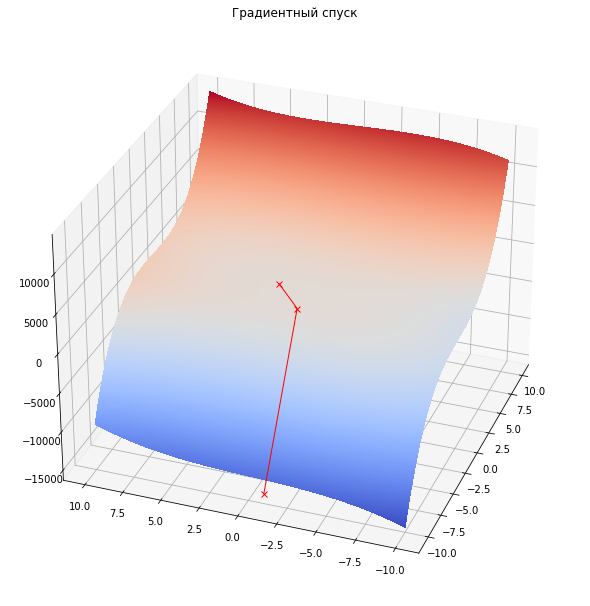

In [12]:
from matplotlib import cm
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(8, 8))
ax = p3.Axes3D(fig, auto_add_to_figure=False)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=1)
ax.plot(x_history[:3], y_history[:3], z_history[:3], 'rx-', linewidth=1, zorder=10)
ax.set_title('Градиентный спуск')
ax.view_init(30, -160)

fig.add_axes(ax)
plt.show()

 # Аналитически значение оптимума для функции

$$
z(x, y) = 13x^3 - 7xy + y^2 +2y^3 - 97
$$
1. Найдем частные производные.
$$
dz = 39𝑥^2−7𝑦
$$
$$
dz = −7𝑥+6𝑦^2+2𝑦
$$
2. Решим систему уравнений.
$$
39x^2-7y = 0
$$
$$
-7x+6y^2+2y = 0
$$
=>
$$
x = (6y^2+2y)/7
$$
$$
39(6y^2+2y)^2/49-7y = 0
$$
$$
y_1 = 0; y_2 = 0.4249
$$
$$
x_1 = 0; x_2 = 0.2761
$$
$$
y = (39x^2)/7
$$
$$
-7x+6((39x^2)/7)^2+(2(39x^2))/7 = 0
$$
$$
x_1 = 0; x_2 = 0.2762
$$
$$
y_1 = 0; y_2 = 0.425
$$
**(0,0) (0.2761, 0.4249) (0.2762, 0.425)**

### Вывод: 
Минимум z(0.2762, 0.425) = -97.21;

Сходимость в точке (0.2761, 0.4249)

# Часть 2


- Предложите свою функцию от одной переменной y=f(x) с несколькими минимумами. Найдите минимумы аналитически и отметьте их на графике функции. (5 баллов)
- Запустите градиентный спуск из разных точек — так, чтобы алгоритм находил разные минимумы (хотя бы два). (5 баллов)
- Продвинутое задание: изобразите на одном графике работу алгоритма для всех запусков. (5 баллов) 

In [13]:
myf = lambda x: x**2+np.sin(3*x)
dmyf = lambda x: 2*x+3*np.cos(3*x)

Надо решить уравение
$$
2x+3cos(3x) = 0
$$

Это примерно 

x ≈ 0.427308
x ≈ 0.680576
x ≈ 1.24459

Тогда исследуем функцию 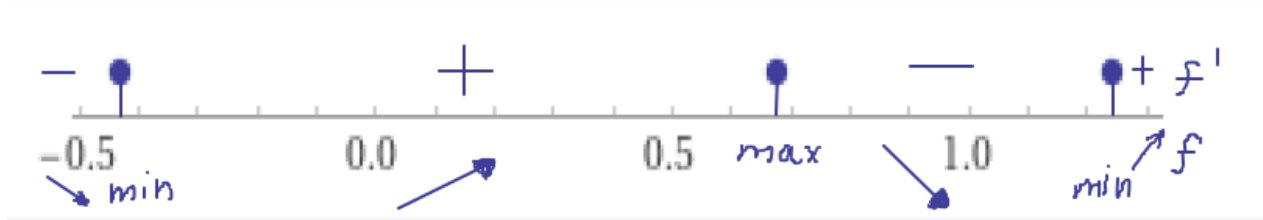


In [14]:
x = np.arange(-3, 3, 0.02)
y = myf(x)

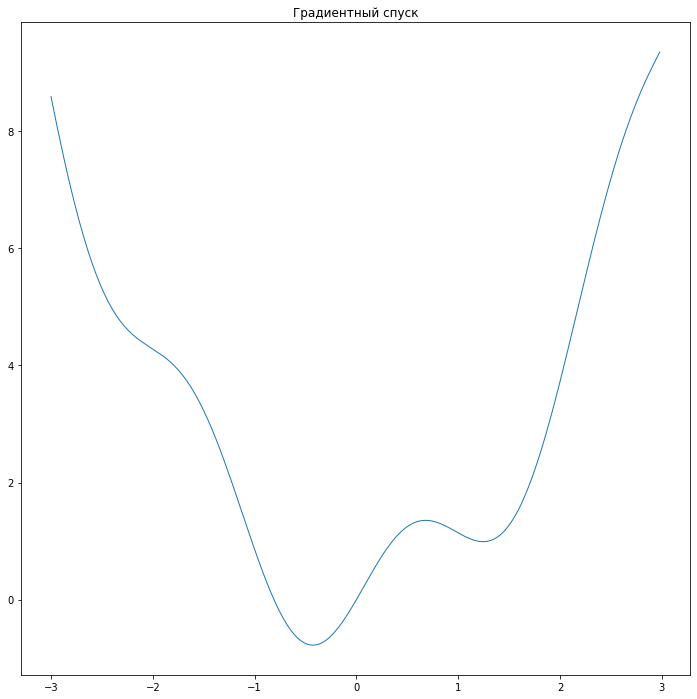

In [15]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, linewidth=1, zorder=10)
ax.set_title('Градиентный спуск')
fig.add_axes(ax)
plt.show()

In [19]:
num_steps = 13
x_history1 = []
y_history1 =[]

data1 = pd.DataFrame(columns=["x", "Function(x)", "Derivative(x)"])
def history_my1(x, f, df):
    global data
    x_history1.append(x)
    y_history1.append(f)

In [20]:
grad_descent_v1(myf, dmyf, x0=-3., lr=0.1, iters=num_steps, callback=history_my1)

-0.4273078613324067

In [21]:
num_steps = 13
x_history2 = []
y_history2 =[]

data2 = pd.DataFrame(columns=["x", "Function(x)", "Derivative(x)"])
def history_my2(x, f, df):
    global data
    x_history2.append(x)
    y_history2.append(f)

In [22]:
grad_descent_v1(myf, dmyf, x0=3., lr=0.1, iters=num_steps, callback=history_my2)

1.2445906257817887

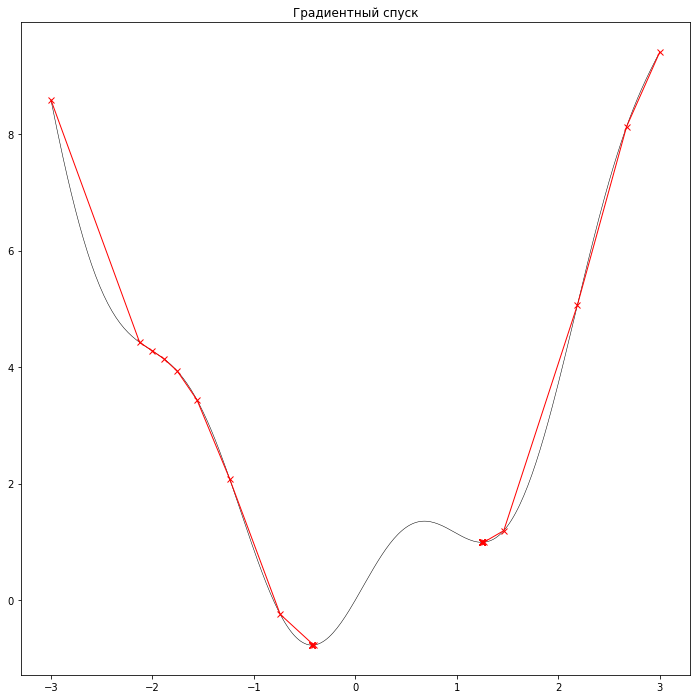

In [23]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'k-', linewidth=0.5)
ax.plot(x_history1, y_history1, 'rx-', linewidth=1, zorder=10)
ax.plot(x_history2, y_history2, 'rx-', linewidth=1, zorder=10)
ax.set_title('Градиентный спуск')
plt.show()
